In [1]:
import pandas as pd
import os

In [77]:
ROOT = '/media/matt/data21/datasets/'
MIMIC_CSV_PATH = os.path.join(ROOT, 'mimic-cxr','data','id_to_findings.csv')
id_findings = pd.read_csv(MIMIC_CSV_PATH)
# reports_clean = pd.read_csv(os.path.join(ROOT, 'mimic-cxr','data','reports_clean.csv'))
labels = pd.read_csv(os.path.join(ROOT, 'mimic-cxr','data','labels', 'mimic-cxr-2.0.0-chexpert.csv.gz'))

In [82]:
labels.fillna(0, inplace=True)
labels.iloc[:,2:]=labels[labels.columns[2:]].astype(int)

id_findings = id_findings[id_findings.ViewPosition=='AP']

id_findings_labels = id_findings.merge(labels, on='study_id', how='left')
id_findings_labels.drop(columns=['Unnamed: 0', 'subject_id_y'], inplace=True)
id_findings_labels.rename(columns={'subject_id_x':'subject_id'}, inplace=True)
id_findings_labels.reset_index(inplace=True)
id_findings_labels.drop(columns=['index'], inplace=True)

In [64]:
# len(id_findings[id_findings.ViewPosition=='AP'])

60547

In [100]:
from skmultilearn.model_selection.measures import get_combination_wise_output_matrix
from collections import Counter
counts = Counter(combination for row in get_combination_wise_output_matrix(y.values, order=4) for combination in row)
counts.most_common()[::-1]
# Order 4 yields combinations with 1 sample, this is enough?

In [98]:
x, y = id_findings_labels.iloc[:,:7].copy(), id_findings_labels.iloc[:,7:].copy()

In [112]:
from skmultilearn.model_selection import iterative_train_test_split, IterativeStratification
stratifier = IterativeStratification(n_splits=10, order=4)
train_idx, test_idx = next(stratifier.split(x, y))
# x_train, y_train, x_test, y_test = iterative_train_test_split(x,y, test_size=0.15)

In [137]:
pt_set = id_findings_labels.iloc[train_idx]['dicom_id'].reset_index()
pt_set.loc[:,'split']='PT'
ft_set = id_findings_labels.iloc[test_idx]['dicom_id'].reset_index()
ft_set.loc[:,'split']='FT'
split_df = pd.concat([pt_set, ft_set], axis=0).drop(columns='index')
split_df.to_csv(os.path.join(ROOT, 'mimic-cxr','data','id_to_split.csv'), index=False)


In [29]:
reports_clean.loc[:,'study_id'] = reports_clean.study_id.apply(lambda x: int(x[1:]))

In [138]:
data = pd.read_csv(os.path.join(ROOT, 'mimic-cxr','data','id_to_findings.csv'))
splits = pd.read_csv(os.path.join(ROOT, 'mimic-cxr','data','id_to_split.csv'))

data = data[data['ViewPosition']=='AP']
data = data.merge(splits, on='dicom_id', how='left')

valid_data = data[data['split']=='PT']

In [139]:
valid_data.head()

,Unnamed: 0,dicom_id,subject_id,study_id,ViewPosition,filepath,findings,impression,split
0,4,68b5c4b1-227d0485-9cc38c3f-7b84ab51-4b472714,10000032,53911762,AP,files/p10/p10000032/s53911762/68b5c4b1-227d048...,Single frontal view of the chest provided. Th...,No acute intrathoracic process.,PT
1,5,fffabebf-74fd3a1f-673b6b41-96ec0ac9-2ab69818,10000032,53911762,AP,files/p10/p10000032/s53911762/fffabebf-74fd3a1...,Single frontal view of the chest provided. Th...,No acute intrathoracic process.,PT
2,6,ea030e7a-2e3b1346-bc518786-7a8fd698-f673b44c,10000032,56699142,AP,files/p10/p10000032/s56699142/ea030e7a-2e3b134...,The lungs are clear of focal consolidation ple...,No acute cardiopulmonary process.,PT
3,7,096052b7-d256dc40-453a102b-fa7d01c6-1b22c6b4,10000764,57375967,AP,files/p10/p10000764/s57375967/096052b7-d256dc4...,PA and lateral views of the chest provided. ...,Focal consolidation at the left lung base poss...,PT
4,15,d0b71acc-b5a62046-bbb5f6b8-7b173b85-65cdf738,10000935,50578979,AP,files/p10/p10000935/s50578979/d0b71acc-b5a6204...,Lung volumes remain low. There are innumerabl...,1. Low lung volumes and mild pulmonary vascula...,PT


In [27]:
md[md.ViewPosition=='AP']['study_id']

4         53911762
5         53911762
6         56699142
7         57375967
15        50578979
            ...   
377102    58497551
377103    58708861
377107    55368167
377108    58621812
377109    58971208
Name: study_id, Length: 147173, dtype: int64

In [28]:
os.getcwd()

'/home/matt/Coding/research/mmRad'

AttributeError: module 'os' has no attribute 'changecwd'

In [72]:
reps_imp = pd.read_csv('/media/matt/data21/datasets/mimic-cxr/data/reports_clean_impressions.csv')

In [73]:
reps_imp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187576 entries, 0 to 187575
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   subject_id  187576 non-null  object
 1   study_id    187576 non-null  object
 2   findings    187498 non-null  object
 3   impression  187575 non-null  object
dtypes: object(4)
memory usage: 5.7+ MB


In [59]:
ROOT = '/media/matt/data21/datasets/mimic-cxr'
LIST_FILE = os.path.join(ROOT, 'data', 'cxr-study-list.csv.gz')
REPORTS_DIR = os.path.join(ROOT, 'data', 'mimic-cxr-reports')
ldf = pd.read_csv(LIST_FILE)

In [19]:
from utils import load_tsv
img_data = load_tsv('/media/matt/data21/mmRad/img_features/mimic_img_with_findings.tsv', topk=500)


Starting to load pre-extracted Faster-RCNN detected objects from /media/matt/data21/mmRad/img_features/mimic_img_with_findings.tsv...
Loaded 500 image features from /media/matt/data21/mmRad/img_features/mimic_img_with_findings.tsv in 0.95 seconds.




In [20]:
t = pd.read_csv('/media/matt/data21/datasets/mimic-cxr/data/id_to_findings.csv')

In [24]:
t[t['dicom_id'].isin(img_data.keys())].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    500 non-null    int64 
 1   dicom_id      500 non-null    object
 2   subject_id    500 non-null    int64 
 3   study_id      500 non-null    int64 
 4   ViewPosition  481 non-null    object
 5   filepath      500 non-null    object
 6   findings      500 non-null    object
 7   impression    500 non-null    object
dtypes: int64(3), object(5)
memory usage: 35.2+ KB


In [18]:
labels = pd.read_csv('/media/matt/data21/datasets/mimic-cxr/data/labels/mimic-cxr-2.0.0-chexpert.csv')
labels.fillna(0, inplace=True)
labels.replace(to_replace=-1., value=0., inplace=True)

In [16]:
labels.head(10).iloc[:,2:].values

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  0.,
         0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.],
       [ 0.,  0.,  0., -1.,  0.,  0.,  0., -1.,  0.,  1.,  0.,  1.,  0.,
         0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0., -1.,  0.,
         0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.]])

In [35]:
import numpy as np
np.asarray(labels[labels.columns[2:]])

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [37]:
labels[labels.columns[2:]].values

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [71]:
with open('reports_no_findings.txt', 'w') as out:

    for p in ldf[~ldf['study_id'].isin(values)].head()['path']:
        with open(os.path.join(REPORTS_DIR, p)) as report:
            out.write(report.read())

In [70]:
os.getcwd()

'/home/matt/Coding/research/mmRad'

In [4]:
import pandas as pd
ROOT = '/media/matt/data21/datasets/mimic-cxr'
LIST_FILE = os.path.join(ROOT, 'data', 'cxr-study-list.csv.gz')
REPORTS_DIR = os.path.join(ROOT, 'data', 'mimic-cxr-reports')
META_FILE = os.path.join(ROOT, 'data', 'mimic-cxr-reports', )
ldf = pd.read_csv(LIST_FILE)

In [5]:
reports_clean = pd.read_csv('/media/matt/data21/datasets/mimic-cxr/data/reports_clean.csv')

In [6]:
metadata = pd.read_csv('/media/matt/data21/datasets/mimic-cxr/data/metadata_edited.csv')

In [8]:
valid_studies = reports_clean['study_id']
valid_sids = [int(v[1:]) for v in valid_studies]

In [11]:
txt_data = metadata[metadata['study_id'].isin(valid_sids)].copy()

In [20]:
txt_data.to_csv('/media/matt/data21/datasets/mimic-cxr/data/metadata_edited_findings_only.csv')

In [14]:
txt_data.head(1)

,Unnamed: 0,dicom_id,subject_id,study_id,PerformedProcedureStepDescription,ViewPosition,Rows,Columns,StudyDate,StudyTime,ProcedureCodeSequence_CodeMeaning,ViewCodeSequence_CodeMeaning,PatientOrientationCodeSequence_CodeMeaning,filepath
0,0,02aa804e-bde0afdd-112c0b34-7bc16630-4e384014,10000032,50414267,CHEST (PA AND LAT),PA,3056,2544,21800506,213014.531,CHEST (PA AND LAT),postero-anterior,Erect,files/p10/p10000032/s50414267/02aa804e-bde0afd...


In [21]:
txt_data.drop(columns=['Rows', 'Columns', 'StudyDate', 'StudyTime', 'PerformedProcedureStepDescription', 'ProcedureCodeSequence_CodeMeaning', 'ViewCodeSequence_CodeMeaning', 'PatientOrientationCodeSequence_CodeMeaning', 'filepath'], inplace=True)

In [28]:
txt_data.loc[:,'findings'] = reports_clean[reports_clean['study_id']==txt_data['study_id']]['findings']

ValueError: Can only compare identically-labeled Series objects

In [26]:
reports_clean.loc[:,'study_id'] = reports_clean.study_id.apply(lambda x: int(x[1:]))

In [25]:
txt_data['study_id'].describe()

count    2.251130e+05
mean     5.500850e+07
std      2.885071e+06
min      5.000001e+07
25%      5.250486e+07
50%      5.502266e+07
75%      5.750428e+07
max      5.999992e+07
Name: study_id, dtype: float64

In [27]:
reports_clean['study_id'].describe()

count    1.211150e+05
mean     5.501000e+07
std      2.886375e+06
min      5.000001e+07
25%      5.250880e+07
50%      5.502066e+07
75%      5.750946e+07
max      5.999992e+07
Name: study_id, dtype: float64

In [38]:
txt_data

NameError: name 'txt_data' is not defined

In [29]:
txt_data.loc[:,'findings'] = txt_data.study_id.apply(lambda x: reports_clean[reports_clean['study_id']==x]['findings'])

In [5]:
txt_data = pd.read_csv('/media/matt/data21/datasets/mimic-cxr/data/metadata_edited_findings_only.csv')
reports_clean = pd.read_csv('/media/matt/data21/datasets/mimic-cxr/data/reports_clean.csv')

In [9]:
txt_data = txt_data.merge(reports_clean, on='study_id', how='right')

In [7]:
reports_clean.loc[:,'study_id'] = reports_clean.study_id.apply(lambda x: int(x[1:]))

In [10]:
txt_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 225113 entries, 0 to 225112
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Unnamed: 0                                  225113 non-null  int64  
 1   dicom_id                                    225113 non-null  object 
 2   subject_id_x                                225113 non-null  int64  
 3   study_id                                    225113 non-null  int64  
 4   PerformedProcedureStepDescription           208924 non-null  object 
 5   ViewPosition                                218289 non-null  object 
 6   Rows                                        225113 non-null  int64  
 7   Columns                                     225113 non-null  int64  
 8   StudyDate                                   225113 non-null  int64  
 9   StudyTime                                   225113 non-null  float64
 

In [11]:
txt_data.drop(columns=['Unnamed: 0',
                       'PerformedProcedureStepDescription',
                       'Rows', 'Columns', 'StudyDate', 'StudyTime',
                       'ProcedureCodeSequence_CodeMeaning',
                       'ViewCodeSequence_CodeMeaning',
                       'PatientOrientationCodeSequence_CodeMeaning',
                       'subject_id_y'], inplace=True)

In [15]:
txt_data.rename(columns={'subject_id_x':'subject_id'}, inplace=True)

In [17]:
txt_data.to_csv('/media/matt/data21/datasets/mimic-cxr/data/id_to_findings.csv')

In [18]:
input('blah')

KeyboardInterrupt: Interrupted by user

In [39]:
txt_data = pd.read_csv('/media/matt/data21/datasets/mimic-cxr/data/id_to_findings.csv')

In [42]:
txt_data.drop(columns='Unnamed: 0', inplace=True)

In [49]:
np.asarray(labels[labels.columns[2:]])

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [53]:
onehot_labels = labels[['study_id', 'labels']].copy()

In [54]:
onehot_labels.to_csv()

,study_id,labels
0,50414267,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ..."
1,53189527,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ..."
2,53911762,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ..."
3,56699142,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ..."
4,57375967,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...
227822,58708861,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ..."
227823,57132437,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ..."
227824,55368167,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
227825,58621812,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [46]:
txt_data.merge(labels, on='study_id', how='left').head()

,dicom_id,subject_id_x,study_id,ViewPosition,filepath,findings,impression,subject_id_y,Atelectasis,Cardiomegaly,...,Enlarged Cardiomediastinum,Fracture,Lung Lesion,Lung Opacity,No Finding,Pleural Effusion,Pleural Other,Pneumonia,Pneumothorax,Support Devices
0,02aa804e-bde0afdd-112c0b34-7bc16630-4e384014,10000032,50414267,PA,files/p10/p10000032/s50414267/02aa804e-bde0afd...,There is no focal consolidation pleural effusi...,No acute cardiopulmonary process.,10000032,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,174413ec-4ec4c1f7-34ea26b7-c5f994f8-79ef1962,10000032,50414267,LATERAL,files/p10/p10000032/s50414267/174413ec-4ec4c1f...,There is no focal consolidation pleural effusi...,No acute cardiopulmonary process.,10000032,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2a2277a9-b0ded155-c0de8eb9-c124d10e-82c5caab,10000032,53189527,PA,files/p10/p10000032/s53189527/2a2277a9-b0ded15...,The cardiac mediastinal and hilar contours are...,No acute cardiopulmonary abnormality.,10000032,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,e084de3b-be89b11e-20fe3f9f-9c8d8dfe-4cfd202c,10000032,53189527,LATERAL,files/p10/p10000032/s53189527/e084de3b-be89b11...,The cardiac mediastinal and hilar contours are...,No acute cardiopulmonary abnormality.,10000032,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,68b5c4b1-227d0485-9cc38c3f-7b84ab51-4b472714,10000032,53911762,AP,files/p10/p10000032/s53911762/68b5c4b1-227d048...,Single frontal view of the chest provided. Th...,No acute intrathoracic process.,10000032,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [67]:
labels[['study_id','labels']].to_csv('/media/matt/data21/datasets/mimic-cxr/data/labels/chexpert_multilabel.csv', index=False)


In [71]:
str(labels['labels'][0])

'[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]'

In [72]:
chex = pd.read_csv('/media/matt/data21/mmRad/MIMIC/labels/mimic-cxr-2.0.0-chexpert.csv.gz')

In [73]:
chex.columns


Index(['subject_id', 'study_id', 'Atelectasis', 'Cardiomegaly',
       'Consolidation', 'Edema', 'Enlarged Cardiomediastinum', 'Fracture',
       'Lung Lesion', 'Lung Opacity', 'No Finding', 'Pleural Effusion',
       'Pleural Other', 'Pneumonia', 'Pneumothorax', 'Support Devices'],
      dtype='object')

In [1]:
import torch

In [2]:
labs = torch.randint(0,2,(4,14))

In [4]:
compute_auc = torch.sum(labs, dim=0)>1

In [5]:
compute_auc

tensor([ True,  True,  True,  True, False,  True,  True, False,  True, False,
         True,  True, False,  True])

In [6]:
labs[:,compute_auc]

tensor([[0, 1, 0, 1, 1, 1, 1, 0, 0, 1],
        [1, 1, 1, 1, 0, 1, 0, 1, 1, 0],
        [1, 1, 0, 1, 1, 0, 0, 1, 1, 0],
        [0, 0, 1, 0, 1, 0, 1, 0, 1, 1]])

In [7]:
labs[:,~compute_auc]

tensor([[0, 0, 0, 0],
        [0, 0, 1, 0],
        [0, 0, 0, 0],
        [0, 1, 0, 0]])

In [8]:
uns = torch.randint(0,5,(1,5))
uns

tensor([[0, 1, 0, 0, 0]])

In [11]:
uns.squeeze(0)


tensor([0, 1, 0, 0, 0])

In [5]:
from tokenizers import BertWordPieceTokenizer

tokenizer = BertWordPieceTokenizer("bert-base-uncased-vocab.txt", lowercase=True)

Exception: Error while initializing WordPiece: No such file or directory (os error 2)

In [7]:
from transformers import BertTokenizer
tok = BertTokenizer.from_pretrained(
            'bert-base-uncased',
            do_lower_case=True
        )

In [8]:
tok('[MASK]')

{'input_ids': [101, 103, 102], 'token_type_ids': [0, 0, 0], 'attention_mask': [1, 1, 1]}

In [13]:
torch.full((5,4),5)[3,[1,2]]

tensor([5, 5])

In [11]:
import torch

In [14]:
import pandas as pd

fid = pd.read_csv('/media/matt/data21/datasets/mimic-cxr/data/id_to_findings.csv')

In [17]:
fid['findings'].describe()

count                                                225113
unique                                               108633
top       Heart size is normal.  The mediastinal and hil...
freq                                                   2209
Name: findings, dtype: object

In [18]:
fid.findings.map(len).max()

1836

In [23]:
ser = fid.findings.str.split()

In [27]:
ser.map(lambda x: len(x)).median()

43.0

In [1]:
import torch

from modules import *



In [ ]:
model = MMRadForClassification(args=args,
                                       train_size=dm.train_size, 
                                       n_classes=dm.num_classes).load_from_checkpoint(checkpoint_callback.best_model_path,
                                                                                        args=args,
                                                                                        train_size=dm.train_size, 
                                                                                        n_classes=dm.num_classes)
        model.model.save_pretrained(save_directory=args.save_cp_path + args.run_name + '/backbone/')
        print(f"Tx backbone saved to {args.save_cp_path + args.run_name + '/backbone/'}")
        wandb_logger.experiment.config['backbone_path'] = args.save_cp_path + args.run_name + '/backbone/'

In [3]:
ROOT = '/media/matt/data21/datasets/mimic-cxr/data'
MIMIC = os.path.join(ROOT, 'mimic-cxr','data','id_to_findings.csv')

In [4]:
os.listdir(ROOT)

['.~lock.reports_clean (copy).csv#',
 'cxr-record-list.csv.gz',
 'cxr-study-list.csv.gz',
 'id_to_findings.csv',
 'id_to_split.csv',
 'images',
 'labels',
 'metadata_edited (copy).csv',
 'metadata_edited.csv',
 'metadata_edited_findings_only.csv',
 'mimic-cxr-2.0.0-metadata.csv.gz',
 'mimic-cxr-2.0.0-split.csv.gz',
 'mimic-cxr-reports',
 'reports_clean.csv',
 'reports_clean_impressions.csv']

In [5]:
records = pd.read_csv(os.path.join(ROOT,'cxr-record-list.csv.gz'))

In [7]:
studies = pd.read_csv(os.path.join(ROOT,'cxr-study-list.csv.gz'))

In [9]:
meta = pd.read_csv(os.path.join(ROOT,'mimic-cxr-2.0.0-metadata.csv.gz'))

In [16]:
meta.ViewPosition.value_counts()

AP                147173
PA                 96161
LATERAL            82853
LL                 35133
PA LLD                 4
LAO                    3
RAO                    3
AP AXIAL               2
AP LLD                 2
XTABLE LATERAL         2
AP RLD                 2
SWIMMERS               1
PA RLD                 1
LPO                    1
Name: ViewPosition, dtype: int64

In [4]:
import numpy as np

In [17]:
geo = np.random.geometric(.25, 100)

In [23]:
import random

random.choice(([2], [4,3], [1,2,5]))

[4, 3]

(array([0.28555556, 0.21777778, 0.14555556, 0.12666667, 0.08      ,
        0.06111111, 0.04888889, 0.02333333, 0.03888889, 0.08333333]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <BarContainer object of 10 artists>)

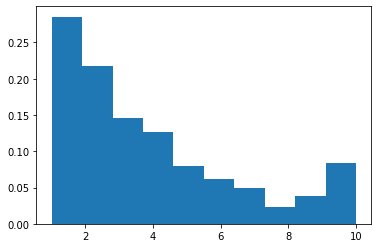

In [16]:
geo[geo>10]=10
import matplotlib.pyplot as plt

plt.hist(geo, bins=10, density=True)

In [12]:
meta[meta.ViewPosition=='PA'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96161 entries, 0 to 377105
Data columns (total 12 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   dicom_id                                    96161 non-null  object 
 1   subject_id                                  96161 non-null  int64  
 2   study_id                                    96161 non-null  int64  
 3   PerformedProcedureStepDescription           78837 non-null  object 
 4   ViewPosition                                96161 non-null  object 
 5   Rows                                        96161 non-null  int64  
 6   Columns                                     96161 non-null  int64  
 7   StudyDate                                   96161 non-null  int64  
 8   StudyTime                                   96161 non-null  float64
 9   ProcedureCodeSequence_CodeMeaning           96161 non-null  object 
 10  ViewCodeS